In [1]:
import numpy as np
# Powerful n-dimensional arrays. Numerical computing tools. Interoperable:

import pandas as pd
# python powerfull library used for data manipulating and data analysis:

import matplotlib.pyplot as plt
# mayplotlib is a ploting library we can use this to make awesome graphs:

import seaborn as sns
# seaborn also a ploting library we can use this to make awesome graphs:

%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the inline:

In [2]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

In [3]:
# Load data:

data = pd.read_csv('Admission_Predict.csv')

In [4]:
# showing first five rows of data:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# first we check our columns name using df.columns function:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
data.drop('Serial No.',axis=1,inplace=True)

# axis = 1 because of its by default axis=0 . axis  = 0 means row wise , axis = 1 means column wise 
# so here we want to remove a column so we uset axis = 1 .

# inplace = True . mean we want this changing in our main dataset -

In [7]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
data.describe()
# using this function we can simply find [count,mean,std,min,25%,50%,75%,max]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
data.corr()
# dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe 
# it is ignored.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

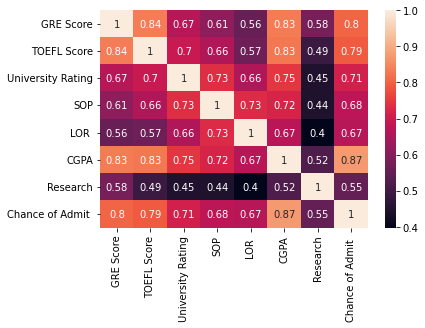

In [10]:
sns.heatmap(data.corr(),annot=True)
# now you can simple check out correlation between x and y variables:

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

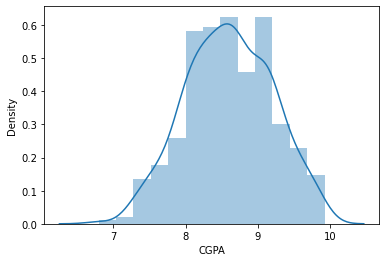

In [11]:
sns.distplot(data['CGPA'])

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

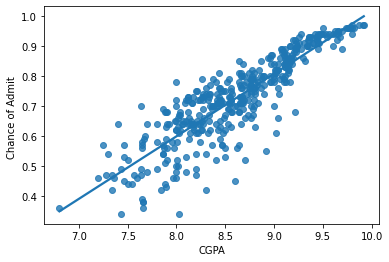

In [12]:
sns.regplot(x='CGPA',y='Chance of Admit ',data=data,ci=None)

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

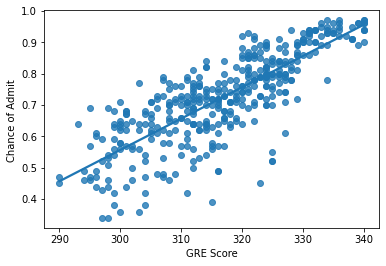

In [13]:
sns.regplot(x='GRE Score',y='Chance of Admit ',data=data,ci=None)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

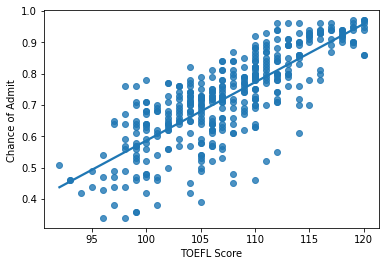

In [14]:
sns.regplot(x='TOEFL Score',y='Chance of Admit ',data=data,ci=None)

In [19]:
x = data[['CGPA','GRE Score','TOEFL Score']]
y = data[['Chance of Admit ']]

In [16]:
# Split data for test and train the model.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=.20)

In [17]:
# x shape
x.shape

(400, 3)

In [18]:
# x_train shape 80% of data from x - 20% other data for test
x_train.shape

(320, 3)

In [20]:
# x_train first five rows:
x_train.head()

,CGPA,GRE Score,TOEFL Score
336,8.79,319,110
64,8.70,325,111
55,7.70,320,103
106,9.18,329,111
300,8.00,309,106


In [21]:
#object
linreg = LinearRegression()

# fiting our data for training
linreg.fit(x_train,y_train)

LinearRegression()

In [22]:
# our model is ready to predict y.
y_predict = linreg.predict(x_test)

# our model prediction
y_predict[:10]

array([[0.69367708],
       [0.70808004],
       [0.77715683],
       [0.64062992],
       [0.73691764],
       [0.61296614],
       [0.72954121],
       [0.62755658],
       [0.90054979],
       [0.90501787]])

In [23]:
# y test
y_test[:10]

,Chance of Admit
132,0.71
309,0.70
341,0.79
196,0.73
246,0.72
60,0.48
155,0.77
261,0.71
141,0.90
214,0.94


In [24]:
# from sklearn import metrics
# already imported

metrics.mean_absolute_error(y_test,y_predict)

0.050689732983069224